In [25]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.spatial.distance import cdist

In [19]:
font = FontProperties(fname='/System/Library/Fonts/Optima.ttc', size=10)

## K-Means with Elbow Method

In [8]:
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))
X = np.hstack((cluster1, cluster2)).T
X

array([[0.87235234, 1.1360882 ],
       [1.31407908, 0.88142469],
       [0.72073542, 1.03385235],
       [1.17920419, 1.20996204],
       [1.06056511, 1.3215987 ],
       [0.65949841, 1.23625793],
       [0.59836063, 0.51586739],
       [1.3829443 , 1.25994983],
       [0.5899113 , 1.38533637],
       [0.72786046, 1.04517673],
       [3.97417469, 4.36207601],
       [3.5740891 , 3.58698127],
       [4.06908933, 4.2805473 ],
       [3.60405112, 4.25470146],
       [3.53558444, 3.51575381],
       [3.63227986, 4.20415716],
       [3.83675177, 3.91154562],
       [4.31237346, 4.04327062],
       [4.32584026, 4.09129506],
       [4.03667863, 3.80739214]])

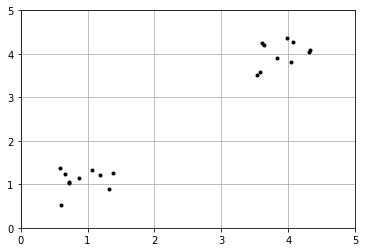

In [9]:
plt.figure()
plt.axis([0,5,0,5])
plt.grid(True)
plt.plot(X[:,0],X[:,1],'k.')

KMeans Cost Function: the sum of squared distances between each observation and its closest centroid
scipy.spatial.distance.cdist: Computes distance between "each pair" of the two collections of inputs

In [12]:
XA = [
    [1,1],
    [2,2]
]
XB = [[3,3],
     [4,4]]
Y = cdist(XA, XB, 'euclidean')
Y

array([[2.82842712, 4.24264069],
       [1.41421356, 2.82842712]])

Choose the number in first axis, which are the euclidean distance between obervation points and their centroids

In [13]:
npmin = np.min(Y, axis=1)
npmin

array([2.82842712, 1.41421356])

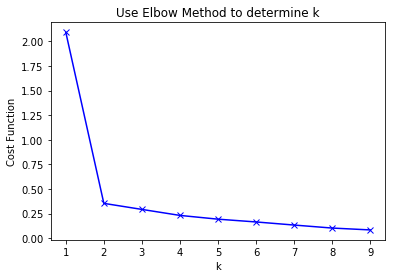

In [24]:
K = range(1, 10)
costfunction = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    costfunction.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))/X.shape[0])
plt.plot(K, costfunction, 'bx-') #color: blue, dot:x, line:-
plt.xlabel('k')
plt.ylabel('Cost Function')
plt.title('Use Elbow Method to determine k')

## Get the nearest point to the centroid for each cluster

In [26]:
X = np.random.randn(10, 4)
X

array([[ 0.79510369,  1.30403718, -0.25823651,  0.00883854],
       [ 0.60310793, -0.22134562, -1.22096606,  1.37239175],
       [-1.17206415,  1.90814421, -0.39711316, -0.74658467],
       [ 0.67938649,  0.68032088, -1.31104394, -0.769214  ],
       [ 0.37114293, -2.0360935 , -0.71078423, -1.18363804],
       [ 0.42891338, -0.52082674, -1.58814929,  0.32641069],
       [-1.87707487, -0.11826366,  0.57669957,  0.24874539],
       [-1.14936894, -1.90292369,  0.80849995,  0.42947755],
       [-1.67197423, -1.53414993,  0.67402105, -2.41220209],
       [-0.41434495,  0.08913168, -1.64651484, -1.06290855]])

#### pairwise_distances_argmin_min: compute minimum distances between one point and a set of points
#### closest contains the index of the point in x that is closest to each centriod. So X[3] is the closest point in X to centroid 0, and X[7]

In [29]:
km = KMeans(n_clusters=2).fit(X)
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X)
closest

array([3, 7])